# Cartoon Recommendation System

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline

# Read the data

In [2]:
df = pd.read_csv("anime.csv")
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
df.shape

(12294, 7)

In [4]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

# Handling Missing Value

## Handling missing rating

In [5]:
df.loc[df['rating'].isnull(), 'rating'] = 0.0
df['rating'].isnull().any()

False

## Handling missing type

<AxesSubplot:>

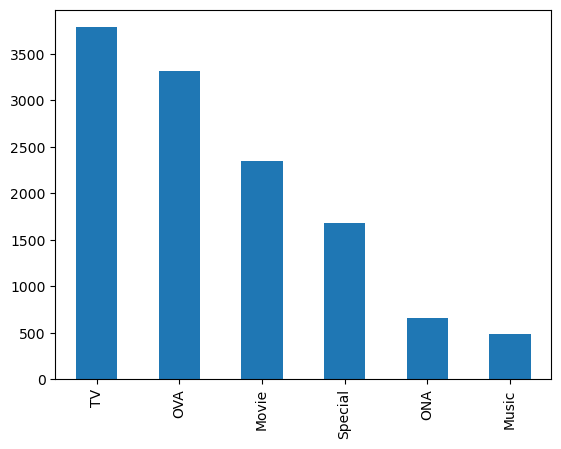

In [6]:
df['type'].value_counts().plot.bar()

In [7]:
df.loc[(df['episodes']=="Unknown") & (df['type'].isnull())].head()

,anime_id,name,genre,type,episodes,rating,members
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,0.0,60999
10900,34437,Code Geass: Fukkatsu no Lelouch,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",NaN,Unknown,0.0,22748
10906,33352,Violet Evergarden,"Drama, Fantasy",NaN,Unknown,0.0,20564
10907,33248,K: Seven Stories,"Action, Drama, Super Power, Supernatural",NaN,Unknown,0.0,22133
10918,33845,Free! (Shinsaku),"School, Sports",NaN,Unknown,0.0,8666


In [8]:
missing = df.loc[(df['episodes']=="Unknown") & (df['type'].isnull())].copy()
missing.shape

(25, 7)

In [9]:
missing.head(25)

,anime_id,name,genre,type,episodes,rating,members
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,0.0,60999
10900,34437,Code Geass: Fukkatsu no Lelouch,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",NaN,Unknown,0.0,22748
10906,33352,Violet Evergarden,"Drama, Fantasy",NaN,Unknown,0.0,20564
10907,33248,K: Seven Stories,"Action, Drama, Super Power, Supernatural",NaN,Unknown,0.0,22133
10918,33845,Free! (Shinsaku),"School, Sports",NaN,Unknown,0.0,8666
10949,33475,Busou Shoujo Machiavellianism,"Action, School, Shounen",NaN,Unknown,0.0,1896
10963,31456,Code:Realize: Sousei no Himegimi,"Adventure, Fantasy, Romance, Shoujo",NaN,Unknown,0.0,4017
10983,34332,Flying Babies,NaN,NaN,Unknown,0.0,22
10988,34280,Gamers!,"Comedy, Romance, School",NaN,Unknown,0.0,1045
10990,34485,Ganko-chan,NaN,NaN,Unknown,0.0,11


In [10]:
df.loc[(df['name'] == "Steins;Gate 0"), 'type'] = 'TV'
df.loc[(df['name'] == "Steins;Gate 0"), 'episodes'] = '23'
df.loc[(df['name'] == "Violet Evergarden"), 'type'] = 'TV'
df.loc[(df['name'] == "Violet Evergarden"), 'episodes'] = '13'
df.loc[(df['name'] == "Code Geass: Fukkatsu no Lelouch"), 'type'] = 'TV'
df.loc[(df['name'] == "Code Geass: Fukkatsu no Lelouch"), 'episodes'] = '25'
df.loc[(df['name'] == "K: Seven Stories"), 'type'] = 'Movie'
df.loc[(df['name'] == "K: Seven Stories"), 'episodes'] = '6'
df.loc[(df['name'] == "Free! (Shinsaku)"), 'type'] = 'TV'
df.loc[(df['name'] == "Free! (Shinsaku)"), 'episodes'] = '12'
df.loc[(df['name'] == "Busou Shoujo Machiavellianism"), 'type'] = 'TV'
df.loc[(df['name'] == "Busou Shoujo Machiavellianism"), 'episodes'] = '12'
df.loc[(df['name'] == "Code:Realize: Sousei no Himegimi"), 'type'] = 'TV'
df.loc[(df['name'] == "Code:Realize: Sousei no Himegimi"), 'episodes'] = '12'
df.loc[(df['name'] == "Gamers!"), 'type'] = 'TV'
df.loc[(df['name'] == "Gamers!"), 'episodes'] = '12'
df.loc[(df['name'] == "Ganko-chan"), 'type'] = 'TV'
df.loc[(df['name'] == "Ganko-chan"), 'episodes'] = '10'
df.loc[(df['name'] == "Ginga Eiyuu Densetsu (2017)"), 'type'] = 'OVA'
df.loc[(df['name'] == "Ginga Eiyuu Densetsu (2017)"), 'episodes'] = '110'
df.loc[(df['name'] == "Grancrest Senki"), 'type'] = 'TV'
df.loc[(df['name'] == "Grancrest Senki"), 'episodes'] = '24'
df.loc[(df['name'] == "IDOLiSH7"), 'type'] = 'TV'
df.loc[(df['name'] == "IDOLiSH7"), 'episodes'] = '17'
df.loc[(df['name'] == "Isekai Shokudou"), 'type'] = 'TV'
df.loc[(df['name'] == "Isekai Shokudou"), 'episodes'] = '12'
df.loc[(df['name'] == "Oushitsu Kyoushi Haine"), 'type'] = 'TV'
df.loc[(df['name'] == "Oushitsu Kyoushi Haine"), 'episodes'] = '12'
df.loc[(df['name'] == "Peace Maker Kurogane (Shinsaku)"), 'type'] = 'TV'
df.loc[(df['name'] == "Peace Maker Kurogane (Shinsaku)"), 'episodes'] = '24'
df.loc[(df['name'] == "Seikaisuru Kado"), 'type'] = 'TV'
df.loc[(df['name'] == "Seikaisuru Kado"), 'episodes'] = '12'
df.loc[(df['name'] == "UQ Holder!"), 'type'] = 'TV'
df.loc[(df['name'] == "UQ Holder!"), 'episodes'] = '12'
df.loc[(df['name'] == "Citrus"), 'type'] = 'TV'
df.loc[(df['name'] == "Citrus"), 'episodes'] = '12'
df.loc[(df['name'] == "Hitorijime My Hero"), 'type'] = 'TV'
df.loc[(df['name'] == "Hitorijime My Hero"), 'episodes'] = '12'
df.isnull().sum()

anime_id     0
name         0
genre       62
type         6
episodes     0
rating       0
members      0
dtype: int64

In [11]:
df.dropna(subset=['type'], inplace=True)
df.shape

(12288, 7)

## Handling Unknown Genre

In [12]:
df.isnull().sum()

anime_id     0
name         0
genre       61
type         0
episodes     0
rating       0
members      0
dtype: int64

In [13]:
df[df['genre'].isnull()]

,anime_id,name,genre,type,episodes,rating,members
2844,33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.15,6604
3541,33589,ViVid Strike!,NaN,TV,12,6.96,12345
6040,29765,Metropolis (2009),NaN,Movie,1,6.27,313
6646,32695,Match Shoujo,NaN,ONA,1,6.02,242
7018,33187,Katsudou Shashin,NaN,Movie,1,5.79,607
...,...,...,...,...,...,...,...
11070,32032,Seikaisuru Kado,NaN,TV,12,0.00,1797
11086,34310,Tamagotchi Movie: Tanpen Himitsu no Otodoke Da...,NaN,Movie,1,0.00,51
11097,34474,Tsukipro The Animation,NaN,TV,Unknown,0.00,843
11112,33035,Yuyushiki Special,NaN,Special,1,0.00,2294


For now, let's just fill it with 'Unknown'.

In [14]:
df['genre'].fillna('Unknown', inplace=True)
df.isnull().any()

anime_id    False
name        False
genre       False
type        False
episodes    False
rating      False
members     False
dtype: bool

In [15]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


## Calculate Weighted Rating

In [16]:
m = df.members.quantile(0.75)
C = df.rating.mean()
print(m, C)

9448.5 6.355887858072929


In [17]:
def weighted_rating(df, m, C):
    term = df['members'] / (m + df['members'])
    return df['rating'] * term + (1-term) * C

In [18]:
df['community_rating'] = df.apply(weighted_rating, axis=1, args=(m,C))
df.head()

,anime_id,name,genre,type,episodes,rating,members,community_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,9.234437
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,9.225834
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,9.028960
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,9.131071
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,8.995145


# Feature Selection

In [19]:
data=df

In [20]:
import math
def calculate_entropy(data):
    total_instances = len(data)
    positive_instances = len(data[data['community_rating'] >= 7])
    negative_instances = len(data[data['community_rating'] < 7])

    if positive_instances == 0 or negative_instances == 0:
        return 0

    positive_probability = positive_instances / total_instances
    negative_probability = negative_instances / total_instances

    entropy = -positive_probability * math.log2(positive_probability) - negative_probability * math.log2(negative_probability)
    return entropy

In [21]:
def calculate_information_gain(data, column):
    entropy = calculate_entropy(data)
    unique_values = data[column].unique()
    weighted_entropy = 0

    for value in unique_values:
        subset = data[data[column] == value]
        subset_entropy = calculate_entropy(subset)
        subset_probability = len(subset) / len(data)
        weighted_entropy += subset_probability * subset_entropy

    information_gain = entropy - weighted_entropy
    return information_gain

In [22]:
information_gain = calculate_information_gain(data, 'name')
information_gain

0.6132511429890424

In [23]:
information_gain = calculate_information_gain(data, 'genre')
information_gain

0.3888641338573728

In [25]:
information_gain = calculate_information_gain(data, 'episodes')
information_gain

0.07391778852040642

In [110]:
information_gain = calculate_information_gain(data, 'type')
information_gain

0.047954103539015414

## Dropping some unused columns

In [26]:
df.drop(['anime_id', 'rating', 'members', 'episodes'], axis=1, inplace=True)
df.head()

,name,genre,type,community_rating
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.234437
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.225834
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.028960
3,Steins;Gate,"Sci-Fi, Thriller",TV,9.131071
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,8.995145


## Breakdown the genre and type

In [27]:
df = pd.concat([df, df['type'].str.get_dummies(), df['genre'].str.get_dummies(sep=',')], axis=1)
df.head()

,name,genre,type,community_rating,Movie,Music,ONA,OVA,Special,TV,...,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.234437,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.225834,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.028960,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Steins;Gate,"Sci-Fi, Thriller",TV,9.131071,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,8.995145,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
anime_features = df.loc[:, "Movie":].copy()
anime_features.head()

,Movie,Music,ONA,OVA,Special,TV,Adventure,Cars,Comedy,Dementia,...,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Content Based Recommendation

## Calculate the similarity matrix

In [29]:
cosine_sim = cosine_similarity(anime_features.values, anime_features.values)

In [30]:
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.31622777],
       [0.        , 1.        , 0.375     , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.375     , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.5       ],
       [0.31622777, 0.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ]])

In [31]:
cosine_sim.shape

(12288, 12288)

In [32]:
anime_index = pd.Series(df.index, index=df.name).drop_duplicates()

In [33]:
def get_recommendation1(anime_name, similarity=cosine_sim):
    idx = anime_index[anime_name]
    
    
    sim_scores = list(enumerate(cosine_sim[idx]))

    
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    
    sim_scores = sim_scores[0:11]

   
    anime_indices = [i[0] for i in sim_scores]

    
    result = df[['name', 'genre', 'community_rating']].iloc[anime_indices].drop(idx)
    return result

In [34]:
get_recommendation1("Steins;Gate")

,name,genre,community_rating
10898,Steins;Gate 0,"Sci-Fi, Thriller",0.852459
3581,Fireball Charming,Sci-Fi,6.574226
7984,Hanoka,Sci-Fi,6.040040
8910,Hoshi no Ko Poron,Sci-Fi,6.360831
10079,RoboDz,Sci-Fi,6.338184
10858,Yuusei Kamen,Sci-Fi,6.356795
10975,Escha Chron,Sci-Fi,5.861462
59,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,"Sci-Fi, Thriller",8.504498
126,Steins;Gate: Oukoubakko no Poriomania,"Sci-Fi, Thriller",8.342360
196,Steins;Gate: Kyoukaimenjou no Missing Link - D...,"Sci-Fi, Thriller",7.946121


In [35]:
get_recommendation1("Kimi no Na wa.")

,name,genre,community_rating
208,Kokoro ga Sakebitagatterunda.,"Drama, Romance, School",8.051436
1494,Harmonie,"Drama, School, Supernatural",7.234142
1959,Air Movie,"Drama, Romance, Supernatural",7.207802
60,Hotarubi no Mori e,"Drama, Romance, Shoujo, Supernatural",8.507055
1199,&quot;Bungaku Shoujo&quot; Movie,"Drama, Mystery, Romance, School",7.391296
2103,Clannad Movie,"Drama, Fantasy, Romance, School",7.263791
5796,Taifuu no Noruda,"Drama, School, Sci-Fi, Supernatural",6.352344
5805,Wind: A Breath of Heart OVA,"Drama, Romance, School, Supernatural",6.354841
6394,Wind: A Breath of Heart (TV),"Drama, Romance, School, Supernatural",6.258412
894,Momo e no Tegami,"Drama, Supernatural",7.443333


In [36]:
get_recommendation1("Kokoro ga Sakebitagatterunda.")

,name,genre,community_rating
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",9.234437
1199,&quot;Bungaku Shoujo&quot; Movie,"Drama, Mystery, Romance, School",7.391296
2103,Clannad Movie,"Drama, Fantasy, Romance, School",7.263791
5697,Shiranpuri (Movie),"Drama, School",6.361850
10123,Samurai,"Drama, Romance",6.323656
1389,Orange: Mirai,"Drama, Romance, School, Sci-Fi, Shoujo",7.271370
3544,Ace wo Nerae! (1979),"Drama, Romance, School, Shoujo, Sports",6.440264
11,Koe no Katachi,"Drama, School, Shounen",8.823088
265,Kaze Tachinu,"Drama, Historical, Romance",8.030089
411,Byousoku 5 Centimeter,"Drama, Romance, Slice of Life",8.050585


In [37]:
get_recommendation1("Naruto")

,name,genre,community_rating
615,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",7.912437
175,Katekyo Hitman Reborn!,"Action, Comedy, Shounen, Super Power",8.298872
206,Dragon Ball Z,"Action, Adventure, Comedy, Fantasy, Martial Ar...",8.271811
515,Dragon Ball Kai (2014),"Action, Adventure, Comedy, Fantasy, Martial Ar...",7.710105
588,Dragon Ball Kai,"Action, Adventure, Comedy, Fantasy, Martial Ar...",7.830726
1209,Medaka Box Abnormal,"Action, Comedy, Ecchi, Martial Arts, School, S...",7.472471
1930,Dragon Ball Super,"Action, Adventure, Comedy, Fantasy, Martial Ar...",7.318395
2615,Medaka Box,"Action, Comedy, Ecchi, Martial Arts, School, S...",7.142463
3038,Tenjou Tenge,"Action, Comedy, Ecchi, Martial Arts, School, S...",7.037725
178,Boku no Hero Academia,"Action, Comedy, School, Shounen, Super Power",8.295029


In [38]:
get_recommendation1("Plastic Memories")

,name,genre,community_rating
4084,Ray The Animation,"Drama, Romance, Sci-Fi",6.560607
6366,Seraphim Call,"Drama, Romance, Sci-Fi",6.313714
2279,Saishuu Heiki Kanojo,"Drama, Romance, School, Sci-Fi",7.176445
4002,Ushinawareta Mirai wo Motomete,"Drama, Romance, School, Sci-Fi",6.751428
11079,Shuumatsu Nani Shitemasu ka? Isogashii desu ka...,"Drama, Fantasy, Romance, Sci-Fi",6.191413
1122,Kiznaiver,"Drama, Sci-Fi",7.610122
1548,Winter Sonata,"Drama, Romance",7.036514
5731,Sister Princess: Re Pure,"Drama, Romance",6.361245
11014,Island,"Drama, Sci-Fi",5.406582
168,Planetes,"Drama, Romance, Sci-Fi, Seinen, Space",8.212960


# User Based Recommendation

In [39]:
anime = pd.read_csv("anime.csv")
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [40]:
print(anime.shape)
anime = anime[(anime['type'] == 'TV') | (anime['type'] == 'Movie')]
print(anime.shape)

(12294, 7)
(6135, 7)


In [41]:
m = anime['members'].quantile(0.75)
anime = anime[(anime['members'] >= m)]
anime.shape

(1534, 7)

In [42]:
rating = pd.read_csv("rating.csv")
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [43]:
rating.loc[rating.rating == -1, 'rating'] = np.NaN
rating.head()

,user_id,anime_id,rating
0,1,20,NaN
1,1,24,NaN
2,1,79,NaN
3,1,226,NaN
4,1,241,NaN


# Creating Index for Anime Name

In [44]:
anime_index = pd.Series(anime.index, index=anime.name)
anime_index.head()

name
Kimi no Na wa.                      0
Fullmetal Alchemist: Brotherhood    1
Gintama°                            2
Steins;Gate                         3
Gintama&#039;                       4
dtype: int64

# Joined Data

In [45]:
joined = anime.merge(rating, how='inner', on='anime_id')
joined.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,NaN


# Pivot Table

In [46]:
joined = joined[['user_id', 'name', 'rating_y']]


joined = joined[(joined['user_id'] <= 10000)]

pivot = pd.pivot_table(joined, index='user_id', columns='name', values='rating_y')
pivot.head()

name,&quot;Bungaku Shoujo&quot; Movie,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,07-Ghost,11eyes,30-sai no Hoken Taiiku,91 Days,A-Channel,AKB0048,...,Zoku Natsume Yuujinchou,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,Zutto Mae kara Suki deshita.: Kokuhaku Jikkou Iinkai,ef: A Tale of Melodies.,ef: A Tale of Memories.,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
pivot.shape

(9412, 1490)

# Drop all users that never rate an anime

In [48]:
pivot.dropna(axis=0, how='all', inplace=True)
pivot.head()

name,&quot;Bungaku Shoujo&quot; Movie,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,07-Ghost,11eyes,30-sai no Hoken Taiiku,91 Days,A-Channel,AKB0048,...,Zoku Natsume Yuujinchou,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,Zutto Mae kara Suki deshita.: Kokuhaku Jikkou Iinkai,ef: A Tale of Melodies.,ef: A Tale of Memories.,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
pivot.shape

(9412, 1490)

# Center the mean around 0 (centered cosine / pearson)

In [50]:
pivot_norm = pivot.apply(lambda x: x - np.nanmean(x), axis=1)
pivot_norm.head()

name,&quot;Bungaku Shoujo&quot; Movie,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,07-Ghost,11eyes,30-sai no Hoken Taiiku,91 Days,A-Channel,AKB0048,...,Zoku Natsume Yuujinchou,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,Zutto Mae kara Suki deshita.: Kokuhaku Jikkou Iinkai,ef: A Tale of Melodies.,ef: A Tale of Memories.,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.646341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.62614,NaN,NaN,NaN,NaN,NaN,-2.37386,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# User Based Collaborative Filtering

In [51]:
pivot_norm.fillna(0, inplace=True)
pivot_norm.head()

name,&quot;Bungaku Shoujo&quot; Movie,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,07-Ghost,11eyes,30-sai no Hoken Taiiku,91 Days,A-Channel,AKB0048,...,Zoku Natsume Yuujinchou,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,Zutto Mae kara Suki deshita.: Kokuhaku Jikkou Iinkai,ef: A Tale of Melodies.,ef: A Tale of Memories.,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,-0.646341,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.62614,0.000000,0.0,0.0,0.0,0.0,-2.37386,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


# Calculate Similar User

In [52]:
user_sim_df = pd.DataFrame(cosine_similarity(pivot_norm, pivot_norm), index=pivot_norm.index, columns=pivot_norm.index)
user_sim_df.head()

user_id,1,2,3,5,7,8,9,10,11,12,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,1.000000,0.070572,0.163512,0.021489,0.0,0.121465,0.080198,0.101994,...,-0.105192,-0.142944,0.007926,0.060427,0.053177,0.027009,-0.012482,0.075733,0.033757,0.068755
5,0.0,0.0,0.070572,1.000000,0.076649,0.014843,0.0,0.031263,0.028026,0.092469,...,0.006000,-0.050402,0.048196,0.013640,0.110812,0.171330,-0.018450,0.050163,0.024021,0.008197
7,0.0,0.0,0.163512,0.076649,1.000000,-0.012930,0.0,0.023659,-0.021080,0.062316,...,0.000000,0.000000,-0.000259,0.026777,0.080782,0.094667,0.017602,0.122164,0.047015,-0.012112


In [53]:
def get_similar_user(user_id):
    if user_id not in pivot_norm.index:
        return None, None
    else:
        sim_users = user_sim_df.sort_values(by=user_id, ascending=False).index[1:]
        sim_score = user_sim_df.sort_values(by=user_id, ascending=False).loc[:, user_id].tolist()[1:]
        return sim_users, sim_score

In [54]:
users, score = get_similar_user(3)
for x,y in zip(users[:10], score[:10]):
    print("User {} with similarity of {}".format(x, y))

User 2986 with similarity of 0.3502463920298145
User 3681 with similarity of 0.3407187927372403
User 3028 with similarity of 0.33997937684120616
User 2411 with similarity of 0.33778981442850053
User 4481 with similarity of 0.3376927737260321
User 1966 with similarity of 0.3360271004231097
User 2038 with similarity of 0.3202469495714798
User 1606 with similarity of 0.3194861993583852
User 656 with similarity of 0.31929123836055745
User 3990 with similarity of 0.31674233937417606


# Get Recommendation

In [55]:
def get_recommendation(user_id, n_anime=10):
    users, scores = get_similar_user(user_id)
    
   
    if users is None or score is None:
        return None
    
   
    user_arr = np.array([x for x in users[:10]])
    sim_arr = np.array([x for x in scores[:10]])
    predicted_rating = np.array([])
    
    for anime_name in pivot_norm.columns:
        filtering = pivot_norm[anime_name].loc[user_arr] != 0.0  
        temp = np.dot(pivot[anime_name].loc[user_arr[filtering]], sim_arr[filtering]) / np.sum(sim_arr[filtering])
        predicted_rating = np.append(predicted_rating, temp)
    
    
    temp = pd.DataFrame({'predicted':predicted_rating, 'name':pivot_norm.columns})
    filtering = (pivot_norm.loc[user_id] == 0.0)
    temp = temp.loc[filtering.values].sort_values(by='predicted', ascending=False)

   
    return anime.loc[anime_index.loc[temp.name[:n_anime]]]

In [56]:
import warnings
warnings.filterwarnings('ignore')
get_recommendation(3)

,anime_id,name,genre,type,episodes,rating,members
1304,3712,Zero no Tsukaima: Princesses no Rondo,"Action, Adventure, Comedy, Ecchi, Fantasy, Har...",TV,12,7.60,210891
3788,10578,C³,"Action, Comedy, Ecchi, School, Supernatural",TV,12,6.88,100425
346,223,Dragon Ball,"Adventure, Comedy, Fantasy, Martial Arts, Shou...",TV,153,8.16,316102
100,30230,Diamond no Ace: Second Season,"Comedy, School, Shounen, Sports",TV,51,8.50,38531
254,18689,Diamond no Ace,"Comedy, School, Shounen, Sports",TV,75,8.25,81384
1316,20541,Mikakunin de Shinkoukei,"Comedy, Romance, School, Slice of Life",TV,12,7.59,133385
38,19,Monster,"Drama, Horror, Mystery, Police, Psychological,...",TV,74,8.72,247562
28,457,Mushishi,"Adventure, Fantasy, Historical, Mystery, Seine...",TV,26,8.78,300030
17,24701,Mushishi Zoku Shou 2nd Season,"Adventure, Fantasy, Historical, Mystery, Seine...",TV,10,8.88,75894
3518,12549,"Dakara Boku wa, H ga Dekinai.","Comedy, Ecchi, Romance, Supernatural",TV,12,6.96,169615


In [57]:
get_recommendation(5)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
230,3701,Kaiba,"Adventure, Mystery, Romance, Sci-Fi",TV,12,8.29,56927
38,19,Monster,"Drama, Horror, Mystery, Police, Psychological,...",TV,74,8.72,247562
91,13125,Shinsekai yori,"Drama, Horror, Mystery, Sci-Fi, Supernatural",TV,25,8.53,288376
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
115,523,Tonari no Totoro,"Adventure, Comedy, Supernatural",Movie,1,8.48,271484
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
253,1364,Detective Conan Movie 05: Countdown to Heaven,"Adventure, Comedy, Mystery, Police, Shounen",Movie,1,8.25,25432
6338,5178,First Squad: The Moment of Truth,"Action, Historical, Military, Super Power, Sup...",Movie,1,6.16,25040


In [58]:
get_recommendation(7)

,anime_id,name,genre,type,episodes,rating,members
53,6114,Rainbow: Nisha Rokubou no Shichinin,"Drama, Historical, Seinen, Thriller",TV,26,8.64,139474
244,5365,Tsumiki no Ie,Drama,Movie,1,8.27,45189
4376,14515,Sasami-san@Ganbaranai,"Comedy, Romance, Supernatural",TV,12,6.74,55635
790,12883,Tsuritama,"Comedy, Sci-Fi, Slice of Life, Sports",TV,12,7.84,90625
291,440,Shoujo Kakumei Utena,"Drama, Fantasy, Psychological, Shoujo",TV,39,8.22,77464
492,27989,Hibike! Euphonium,"Drama, Music, School",TV,13,8.03,134694
150,57,Beck,"Comedy, Drama, Music, Shounen, Slice of Life",TV,26,8.40,148328
3178,12119,Natsu-iro Kiseki,"School, Slice of Life, Supernatural",TV,12,7.06,26883
612,97,Last Exile,"Action, Adventure, Sci-Fi",TV,26,7.94,104193
650,10357,Jinrui wa Suitai Shimashita,"Comedy, Fantasy, Seinen",TV,12,7.92,89373


In [59]:
get_recommendation(69)

,anime_id,name,genre,type,episodes,rating,members
57,9989,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada...,"Drama, Slice of Life, Supernatural",TV,11,8.62,463835
411,1689,Byousoku 5 Centimeter,"Drama, Romance, Slice of Life",Movie,3,8.10,324035
80,10162,Usagi Drop,"Josei, Slice of Life",TV,11,8.56,194855
53,6114,Rainbow: Nisha Rokubou no Shichinin,"Drama, Historical, Seinen, Thriller",TV,26,8.64,139474
13,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749
694,433,"Kumo no Mukou, Yakusoku no Basho","Drama, Military, Romance, Sci-Fi",Movie,1,7.89,103975
98,13601,Psycho-Pass,"Action, Police, Psychological, Sci-Fi",TV,22,8.50,509109
440,3588,Soul Eater,"Action, Adventure, Comedy, Fantasy, Shounen, S...",TV,51,8.08,580184
223,2167,Clannad,"Comedy, Drama, Romance, School, Slice of Life,...",TV,23,8.30,566690


# KNN MODEL

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline

In [61]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [62]:

anime = pd.read_csv("anime.csv")

In [63]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [64]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [65]:
anime.loc[(anime["genre"]=="Hentai") & (anime["episodes"]=="Unknown"),"episodes"] = "1"
anime.loc[(anime["type"]=="OVA") & (anime["episodes"]=="Unknown"),"episodes"] = "1"

anime.loc[(anime["type"] == "Movie") & (anime["episodes"] == "Unknown")] = "1"
known_animes = {"Naruto Shippuuden":500, "One Piece":784,"Detective Conan":854, "Dragon Ball Super":86,
                "Crayon Shin chan":942, "Yu Gi Oh Arc V":148,"Shingeki no Kyojin Season 2":25,
                "Boku no Hero Academia 2nd Season":25,"Little Witch Academia TV":25}
for k,v in known_animes.items():    
    anime.loc[anime["name"]==k,"episodes"] = v
anime["episodes"] = anime["episodes"].map(lambda x:np.nan if x=="Unknown" else x)
anime["episodes"].fillna(anime["episodes"].median(),inplace = True)

In [66]:
anime["rating"] = anime["rating"].astype(float)
anime["rating"].fillna(anime["rating"].median(),inplace = True)
anime["members"] = anime["members"].astype(float)

In [67]:
anime_features = pd.concat([anime["genre"].str.get_dummies(sep=","),
                            pd.get_dummies(anime[["type"]]),
                            anime[["rating"]],anime[["members"]],anime["episodes"]],axis=1)
anime["name"] = anime["name"].map(lambda name:re.sub('[^A-Za-z0-9]+', " ", name))
anime_features.head()


,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,type_1,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,rating,members,episodes
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,9.37,200630.0,1
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,9.26,793665.0,64
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.25,114262.0,51
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.17,673572.0,24
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.16,151266.0,51


In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
min_max_scaler = MinMaxScaler()
anime_features = min_max_scaler.fit_transform(anime_features)

In [70]:
np.round(anime_features,2)

array([[0.  , 0.  , 0.  , ..., 0.93, 0.2 , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.92, 0.78, 0.03],
       [0.  , 0.  , 1.  , ..., 0.92, 0.11, 0.03],
       ...,
       [0.  , 0.  , 0.  , ..., 0.43, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.44, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.5 , 0.  , 0.  ]])

# Training

In [71]:
from sklearn.neighbors import NearestNeighbors

In [72]:
nbrs = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(anime_features)
distances, indices = nbrs.kneighbors(anime_features)

In [73]:
distances

array([[0.00000000e+00, 1.01633857e+00, 1.03484164e+00, 1.03547556e+00,
        1.41673596e+00, 1.43504703e+00],
       [0.00000000e+00, 1.02326345e+00, 1.49460533e+00, 1.51670381e+00,
        1.56629658e+00, 1.58703108e+00],
       [0.00000000e+00, 3.78413369e-02, 4.18152040e-02, 2.35264187e-01,
        3.15115844e-01, 1.41517800e+00],
       ...,
       [0.00000000e+00, 1.66526972e-03, 1.68342172e-03, 5.66357548e-03,
        6.86823383e-03, 6.86911414e-03],
       [0.00000000e+00, 1.11268583e-03, 1.20660436e-03, 2.22255509e-03,
        2.24564527e-03, 3.33391240e-03],
       [0.00000000e+00, 1.00000248e+00, 1.00002222e+00, 1.00002225e+00,
        1.00003025e+00, 1.00005000e+00]])

In [74]:
indices

array([[    0,   208,  1494,  1959,    60,   894],
       [    1,   200,   268,   101,   795,   290],
       [    2,     4,     9,    12, 10896,     8],
       ...,
       [12291, 12238, 12237, 12236, 12256, 12235],
       [12292, 12231, 12232, 12230, 12229, 12283],
       [12293,  7426,  8279,  7349,  7335,  7498]], dtype=int64)

# Prediction Function

In [75]:
def get_index_from_name(name):
    return anime[anime["name"]==name].index.tolist()[0]

In [76]:
all_anime_names = list(anime.name.values)

In [77]:
def get_id_from_partial_name(partial):
    for name in all_anime_names:
        if partial in name:
            print(name,all_anime_names.index(name))

In [78]:
def print_similar_animes(query=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(anime.ix[id]["name"])
    if query:
        found_id = get_index_from_name(query)
        for id in indices[found_id][1:]:
            print(anime.loc[id]["name"])

# Testing

In [79]:
print_similar_animes(query="Naruto")

Naruto Shippuuden
Katekyo Hitman Reborn 
Bleach
Dragon Ball Z
Boku no Hero Academia


In [80]:
get_id_from_partial_name("Naruto")


Boruto Naruto the Movie 486
Naruto Shippuuden 615
The Last Naruto the Movie 719
Naruto Shippuuden Movie 6 Road to Ninja 784
Naruto 841
Boruto Naruto the Movie Naruto ga Hokage ni Natta Hi 1103
Naruto Shippuuden Movie 5 Blood Prison 1237
Naruto x UT 1343
Naruto Shippuuden Movie 4 The Lost Tower 1472
Naruto Shippuuden Movie 3 Hi no Ishi wo Tsugu Mono 1573
Naruto Shippuuden Movie 1 1827
Naruto Shippuuden Movie 2 Kizuna 1828
Naruto Shippuuden Shippuu quot Konoha Gakuen quot Den 2374
Naruto Honoo no Chuunin Shiken Naruto vs Konohamaru  2416
Naruto SD Rock Lee no Seishun Full Power Ninden 2457
Naruto Shippuuden Sunny Side Battle 2458
Naruto Movie 1 Dai Katsugeki Yuki Hime Shinobu Houjou Dattebayo  2756
Naruto Soyokazeden Movie Naruto to Mashin to Mitsu no Onegai Dattebayo  2997
Naruto Movie 2 Dai Gekitotsu Maboroshi no Chiteiiseki Dattebayo  3449
Naruto Dai Katsugeki Yuki Hime Shinobu Houjou Dattebayo Special Konoha Annual Sports Festival 3529
Naruto Movie 3 Dai Koufun Mikazuki Jima no Anima

# Recommendation Combiner

In [81]:
user_recommendations=get_recommendation(36)
user_recommendations

,anime_id,name,genre,type,episodes,rating,members
2793,2130,Kaibutsu Oujo,"Action, Comedy, Horror, Shounen, Supernatural,...",TV,25,7.16,44825.0
2035,1313,Digimon Adventure 02,"Action, Adventure, Comedy, Drama, Fantasy, Kids",TV,50,7.37,120268.0
3017,859,Digimon Savers,"Adventure, Comedy, Drama, Fantasy, Shounen",TV,48,7.10,41021.0
1159,874,Digimon Tamers,"Adventure, Comedy, Drama, Fantasy, Shounen",TV,51,7.65,94391.0
346,223,Dragon Ball,"Adventure, Comedy, Fantasy, Martial Arts, Shou...",TV,153,8.16,316102.0
588,6033,Dragon Ball Kai,"Action, Adventure, Comedy, Fantasy, Martial Ar...",TV,97,7.95,116832.0
1,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665.0
912,123,Fushigi Yuugi,"Adventure, Comedy, Drama, Fantasy, Historical,...",TV,52,7.77,61622.0
850,74,Gakuen Alice,"Comedy, Magic, School, Shoujo",TV,26,7.80,52995.0
1663,4551,Hakushaku to Yousei,"Adventure, Fantasy, Historical, Magic",TV,12,7.47,63915.0


In [82]:
search_key=user_recommendations[0:1]
search_key
current_index = search_key.index.astype(int)
index_value = int(search_key.index[0])
index_value

2793

In [83]:
element = str(search_key.at[index_value,'name'])
element

'Kaibutsu Oujo'

In [84]:
content_recommendations=get_recommendation1(element)


In [85]:
content_recommendations

,name,genre,community_rating
2358,Black Blood Brothers,"Action, Comedy, Fantasy, Shounen, Supernatural...",7.168165
1696,Zettai Karen Children,"Action, Comedy, Shounen, Supernatural",7.172000
3192,Zombie-Loan,"Action, Horror, Shounen, Supernatural",6.995463
95,JoJo no Kimyou na Bouken (TV),"Action, Adventure, Shounen, Supernatural, Vampire",8.408054
582,Bleach,"Action, Comedy, Shounen, Super Power, Supernat...",7.926224
785,Owari no Seraph: Nagoya Kessen-hen,"Action, Drama, Shounen, Supernatural, Vampire",7.769713
1172,Owari no Seraph,"Action, Drama, Shounen, Supernatural, Vampire",7.612386
1183,Hellsing,"Action, Horror, Seinen, Supernatural, Vampire",7.601899
1740,Cuticle Tantei Inaba,"Action, Comedy, Mystery, Shounen, Supernatural",7.276162
2609,Kaibutsu Oujo (OVA),"Action, Comedy, Horror, Shounen, Supernatural",6.765086


In [86]:
knn_recommendations=print_similar_animes(query=element)

Black Blood Brothers
Zettai Karen Children
Zombie Loan
Cuticle Tantei Inaba
Night Walker Mayonaka no Tantei


In [87]:

user_weight = 0.7
content_weight = 0.8
knn_weight = 0.2

In [88]:
combined_recommendations = pd.concat([user_recommendations, content_recommendations, knn_recommendations])


In [89]:
combined_recommendations

,anime_id,name,genre,type,episodes,rating,members,community_rating
2793,2130,Kaibutsu Oujo,"Action, Comedy, Horror, Shounen, Supernatural,...",TV,25,7.16,44825.0,NaN
2035,1313,Digimon Adventure 02,"Action, Adventure, Comedy, Drama, Fantasy, Kids",TV,50,7.37,120268.0,NaN
3017,859,Digimon Savers,"Adventure, Comedy, Drama, Fantasy, Shounen",TV,48,7.10,41021.0,NaN
1159,874,Digimon Tamers,"Adventure, Comedy, Drama, Fantasy, Shounen",TV,51,7.65,94391.0,NaN
346,223,Dragon Ball,"Adventure, Comedy, Fantasy, Martial Arts, Shou...",TV,153,8.16,316102.0,NaN
588,6033,Dragon Ball Kai,"Action, Adventure, Comedy, Fantasy, Martial Ar...",TV,97,7.95,116832.0,NaN
1,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665.0,NaN
912,123,Fushigi Yuugi,"Adventure, Comedy, Drama, Fantasy, Historical,...",TV,52,7.77,61622.0,NaN
850,74,Gakuen Alice,"Comedy, Magic, School, Shoujo",TV,26,7.80,52995.0,NaN
1663,4551,Hakushaku to Yousei,"Adventure, Fantasy, Historical, Magic",TV,12,7.47,63915.0,NaN


In [90]:
combined_recommendations['recommendation_score'] = (combined_recommendations['rating'] * user_weight) + \
                                                   (combined_recommendations['rating'] * content_weight) + \
                                                   (combined_recommendations['rating'] * knn_weight)

In [91]:

sorted_recommendations = combined_recommendations.sort_values('recommendation_score', ascending=False)


In [92]:
top_recommendations = sorted_recommendations.head(20)

In [93]:
recommended_titles = list(top_recommendations['name'])

# Final Recommendation

In [94]:
recommended_titles

['Fullmetal Alchemist Brotherhood',
 'Dragon Ball',
 'Dragon Ball Kai',
 'Gakuen Alice',
 'Fushigi Yuugi',
 'Digimon Tamers',
 'Hakushaku to Yousei',
 'Digimon Adventure 02',
 'Kaibutsu Oujo',
 'Digimon Savers',
 'Black Blood Brothers',
 'Zettai Karen Children',
 'Zombie-Loan',
 'JoJo no Kimyou na Bouken (TV)',
 'Bleach',
 'Owari no Seraph: Nagoya Kessen-hen',
 'Owari no Seraph',
 'Hellsing',
 'Cuticle Tantei Inaba',
 'Kaibutsu Oujo (OVA)']

# Performace Metrics

In [95]:
pivot_norm



name,&quot;Bungaku Shoujo&quot; Movie,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,07-Ghost,11eyes,30-sai no Hoken Taiiku,91 Days,A-Channel,AKB0048,...,Zoku Natsume Yuujinchou,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,Zutto Mae kara Suki deshita.: Kokuhaku Jikkou Iinkai,ef: A Tale of Melodies.,ef: A Tale of Memories.,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00000,-0.646341,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,...,0.0,2.62614,0.000000,0.0,0.0,0.0,0.0,-2.37386,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
9997,0.0,0.0,0.0,0.0,-2.071429,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,-0.15,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


In [96]:
df = pd.DataFrame(pivot_norm, )

In [97]:
df


name,&quot;Bungaku Shoujo&quot; Movie,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,07-Ghost,11eyes,30-sai no Hoken Taiiku,91 Days,A-Channel,AKB0048,...,Zoku Natsume Yuujinchou,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,Zutto Mae kara Suki deshita.: Kokuhaku Jikkou Iinkai,ef: A Tale of Melodies.,ef: A Tale of Memories.,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00000,-0.646341,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,...,0.0,2.62614,0.000000,0.0,0.0,0.0,0.0,-2.37386,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
9997,0.0,0.0,0.0,0.0,-2.071429,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,-0.15,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


In [98]:
new_df=df.loc[5]

In [99]:
df2 = pd.DataFrame(combined_recommendations, )

In [100]:
df2.fillna(0, inplace=True)

In [101]:
df2

,anime_id,name,genre,type,episodes,rating,members,community_rating,recommendation_score
2793,2130,Kaibutsu Oujo,"Action, Comedy, Horror, Shounen, Supernatural,...",TV,25,7.16,44825.0,0.000000,12.172
2035,1313,Digimon Adventure 02,"Action, Adventure, Comedy, Drama, Fantasy, Kids",TV,50,7.37,120268.0,0.000000,12.529
3017,859,Digimon Savers,"Adventure, Comedy, Drama, Fantasy, Shounen",TV,48,7.10,41021.0,0.000000,12.070
1159,874,Digimon Tamers,"Adventure, Comedy, Drama, Fantasy, Shounen",TV,51,7.65,94391.0,0.000000,13.005
346,223,Dragon Ball,"Adventure, Comedy, Fantasy, Martial Arts, Shou...",TV,153,8.16,316102.0,0.000000,13.872
588,6033,Dragon Ball Kai,"Action, Adventure, Comedy, Fantasy, Martial Ar...",TV,97,7.95,116832.0,0.000000,13.515
1,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665.0,0.000000,15.742
912,123,Fushigi Yuugi,"Adventure, Comedy, Drama, Fantasy, Historical,...",TV,52,7.77,61622.0,0.000000,13.209
850,74,Gakuen Alice,"Comedy, Magic, School, Shoujo",TV,26,7.80,52995.0,0.000000,13.260
1663,4551,Hakushaku to Yousei,"Adventure, Fantasy, Historical, Magic",TV,12,7.47,63915.0,0.000000,12.699


In [102]:
row_index = df2.index.to_numpy()

In [103]:
row_index

array([2793, 2035, 3017, 1159,  346,  588,    1,  912,  850, 1663, 2358,
       1696, 3192,   95,  582,  785, 1172, 1183, 1740, 2609], dtype=int64)

In [104]:
row_index1=new_df.index.to_numpy()

In [105]:
row_index1


array(['&quot;Bungaku Shoujo&quot; Movie', '.hack//Roots', '.hack//Sign',
       ..., 'xxxHOLiC', 'xxxHOLiC Kei',
       'xxxHOLiC Movie: Manatsu no Yoru no Yume'], dtype=object)

In [106]:
sum1=0
for i in row_index:
    if(i<1500 ):
      value1=new_df[i]
      value=df2.loc[row_index, 'rating']
      sum1=sum1+(value[i]-value1)
      

# Mean Average Precision

In [107]:
MAP=sum1/100

In [108]:
MAP

0.494593009118541

# Root Mean Squared Error

In [109]:
import math
rmse=math.sqrt(MAP)
rmse

0.7032730686714379